#### 설 필수과제 
- fdr 데이터를 가지고 원하는 기업을 분석해 주시면 되는데, 단순히 하나의 전체 시장에 대한 경쟁사 등 다양한 상황을 고려해여 비교가능성이 보일 수 있도록 분석할 것
- 전처리/시각화 필수 

- 반복문을 통해서 최소 5개 이상 시각화해주세요! (컬럼은 최소 4개 이상으로!)
- 재무제표만 가지고 해당 재무성과를 판단하기는 어려울 수 있다.
- 비재무데이터, 신문이나, 뉴스나 등등 해당 분석 과정에서 이상한 점이 발견한다면, 재무외에 비재무적 데이터도 서칭해서 함께 제시할 것

#### 해당 기업에 대해서
- 재무제표 데이터 또는 주가 데이터를 직접 서칭하거나, 구글링을 통해서 불러올 것
- 주가 불러오는 방법: 위의 데이터에서 Symbol 값과 원하는 기준 연도를 적으면 가장 최근 연도까지 데이터를 불러옵니다!

### 에너지 산업 (천연가스 및 연료)
- 문제정의: 서민 울리는 난방비 폭탄, 가스공사 웃었다. 천연가스 관련주 데이터와 재무제표를 바탕으로 시사점을 찾아보자.
- 천연가스 대장주: 지에스이, 대성에너지, 대성산업, 한국가스공사
- 관련주/ 수혜주:서울가스,부산가스,지역난방공사,SK가스,SH에너지화학,삼천리 
- 천연가스 관련주는 천연가스 선물가격에 의해서도 영향받음. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import FinanceDataReader as fdr

In [4]:
df_krx = fdr.StockListing('KRX')
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2697 non-null   object 
 1   ISU_CD       2697 non-null   object 
 2   Name         2697 non-null   object 
 3   Market       2697 non-null   object 
 4   Dept         2697 non-null   object 
 5   Close        2697 non-null   object 
 6   ChangeCode   2697 non-null   object 
 7   Changes      2697 non-null   int64  
 8   ChagesRatio  2697 non-null   float64
 9   Open         2697 non-null   int64  
 10  High         2697 non-null   int64  
 11  Low          2697 non-null   int64  
 12  Volume       2697 non-null   int64  
 13  Amount       2697 non-null   int64  
 14  Marcap       2697 non-null   int64  
 15  Stocks       2697 non-null   int64  
 16  MarketId     2697 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 358.3+ KB


#### info
- KOSDAQ: 중견/중소기업 주식 거래시장
- KOSPI:한국거래소에 상장된 대기업의 주식 거래시장
- KONEX: 코스닥시작 상장 요건을 충족시키지 못하는 벤처/중소기업 전용 주식시장
- KOSDAQ GLOBAL: 코스닥의 블루칩 기업들을 선별한 세그먼트, 총 51개 기업(시총 78조원)으로 코스닥 전체의 23%를 차지 

In [5]:
df_krx.columns

Index(['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'],
      dtype='object')

In [6]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63800,1,300,0.47,63900,64000,63000,15194598,967336146677,380872126690000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,535000,1,2000,0.38,533000,541000,530000,311193,166315331500,125190000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,92200,2,-1200,-1.28,92400,93200,91300,2925123,269612957640,67121818053000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,811000,2,-1000,-0.12,807000,816000,802000,47233,38266363000,57722114000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,714000,2,-2000,-0.28,723000,724000,702000,192762,137570876000,49097874420000,68764530,STK


In [7]:
# 천연가스 대장주
big_gas = df_krx.query('Name == "한국가스공사"|Name == "지에스이"|Name == "대성에너지"|Name == "대성산업"')
big_gas

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
106,036460,KR7036460004,한국가스공사,KOSPI,,32600,3,0,0.00,32600,32750,32100,334750,10868684300,3009403800000,92313000,STK
671,117580,KR7117580001,대성에너지,KOSPI,,10520,1,40,0.38,10600,10910,10450,861727,9217414080,289300000000,27500000,STK
970,128820,KR7128820008,대성산업,KOSPI,,4230,2,-65,-1.51,4305,4345,4230,157295,673287095,191346071940,45235478,STK
1297,053050,KR7053050001,지에스이,KOSDAQ,우량기업부,4330,2,-40,-0.92,4405,4460,4325,669038,2925242750,129846295010,29987597,KSQ


In [8]:
#천연가스 관련주/수혜주
relat_gas = df_krx.query('Name == "서울가스"|Name == "지역난방공사"|Name == "SK가스"|Name == "삼천리"|Name == "SH에너지화학"')
relat_gas

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
129,017390,KR7017390006,서울가스,KOSPI,,469500,1,8000,1.73,458000,471000,450500,17968,8239995500,2347500000000,5000000,STK
155,004690,KR7004690004,삼천리,KOSPI,,475000,1,4000,0.85,471000,482000,465500,30594,14395866500,1926136875000,4055025,STK
229,018670,KR7018670000,SK가스,KOSPI,,120200,2,-500,-0.41,120500,122000,120000,3077,370745300,1109475328800,9230244,STK
552,071320,KR7071320006,지역난방공사,KOSPI,,31050,2,-200,-0.64,30950,31400,30800,2805,87171450,359520001200,11578744,STK
1554,002360,KR7002360006,SH에너지화학,KOSPI,,896,2,-5,-0.55,902,903,896,706427,634706096,99575822080,111133730,STK


In [9]:
gas = pd.concat([big_gas,relat_gas])
gas

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
106,036460,KR7036460004,한국가스공사,KOSPI,,32600,3,0,0.00,32600,32750,32100,334750,10868684300,3009403800000,92313000,STK
671,117580,KR7117580001,대성에너지,KOSPI,,10520,1,40,0.38,10600,10910,10450,861727,9217414080,289300000000,27500000,STK
970,128820,KR7128820008,대성산업,KOSPI,,4230,2,-65,-1.51,4305,4345,4230,157295,673287095,191346071940,45235478,STK
1297,053050,KR7053050001,지에스이,KOSDAQ,우량기업부,4330,2,-40,-0.92,4405,4460,4325,669038,2925242750,129846295010,29987597,KSQ
129,017390,KR7017390006,서울가스,KOSPI,,469500,1,8000,1.73,458000,471000,450500,17968,8239995500,2347500000000,5000000,STK
155,004690,KR7004690004,삼천리,KOSPI,,475000,1,4000,0.85,471000,482000,465500,30594,14395866500,1926136875000,4055025,STK
229,018670,KR7018670000,SK가스,KOSPI,,120200,2,-500,-0.41,120500,122000,120000,3077,370745300,1109475328800,9230244,STK
552,071320,KR7071320006,지역난방공사,KOSPI,,31050,2,-200,-0.64,30950,31400,30800,2805,87171450,359520001200,11578744,STK
1554,002360,KR7002360006,SH에너지화학,KOSPI,,896,2,-5,-0.55,902,903,896,706427,634706096,99575822080,111133730,STK


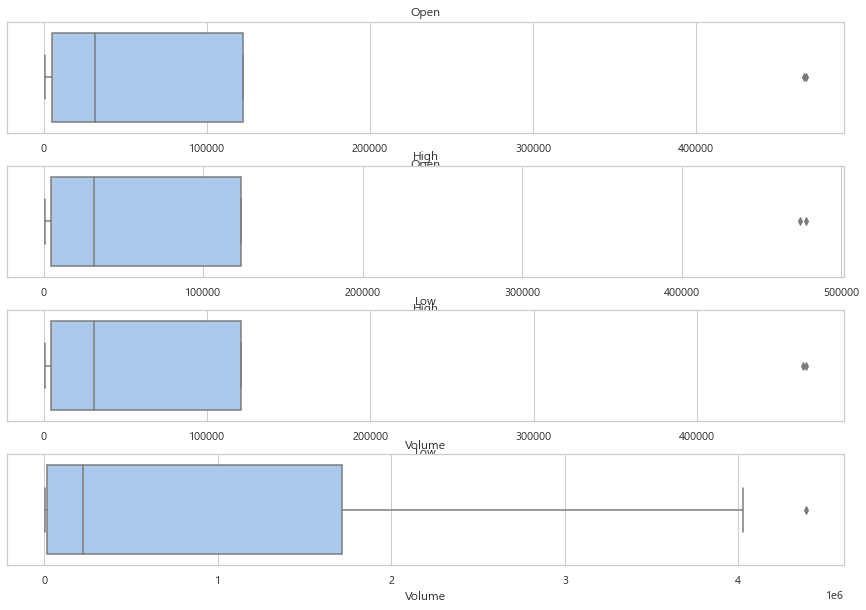

In [67]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4,1)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3)


gas_features = ['Open','High', 'Low', 'Volume']

for idx, feature in enumerate(gas_features):
    ax = plt.subplot(grid[idx])
    sns.boxplot(x=feature, 
                 data= gas,
                 hue='Market',
                 palette='pastel', 
                 ax=ax)
    ax.set_title(f'{feature}')

In [40]:
gas

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
96,036460,KR7036460004,한국가스공사,KOSPI,,34350,2,-50,-0.15,34550,34750,34250,246794,8496756800,3170951550000,92313000,STK
634,117580,KR7117580001,대성에너지,KOSPI,,11050,2,-420,-3.66,11520,11620,11010,1462448,16520982670,303875000000,27500000,STK
945,128820,KR7128820008,대성산업,KOSPI,,4210,2,-135,-3.11,4370,4435,4205,333346,1429633565,190441362380,45235478,STK
1254,053050,KR7053050001,지에스이,KOSDAQ,우량기업부,4490,2,-165,-3.54,4655,4660,4490,1861986,8494263965,134644310530,29987597,KSQ
127,017390,KR7017390006,서울가스,KOSPI,,472000,3,0,0.00,473500,474000,468000,15443,7248772000,2360000000000,5000000,STK
153,004690,KR7004690004,삼천리,KOSPI,,477500,2,-500,-0.10,478000,496000,475500,21875,10586874000,1936274437500,4055025,STK
224,018670,KR7018670000,SK가스,KOSPI,,120000,2,-2300,-1.88,122400,123400,120000,5362,648546100,1107629280000,9230244,STK
520,071320,KR7071320006,지역난방공사,KOSPI,,32100,1,950,3.05,31150,32100,30550,7569,238633500,371677682400,11578744,STK
1538,002360,KR7002360006,SH에너지화학,KOSPI,,892,2,-12,-1.33,904,909,890,904549,811833679,99131287160,111133730,STK


In [29]:
# 난방 공사
koreagas = fdr.DataReader('036460','2022')
seoulgas = fdr.DataReader('017390','2022')
localgas = fdr.DataReader('071320','2022')

In [18]:
# 관련 기업
de = fdr.DataReader('117580','2022') #대성에너지
di = fdr.DataReader('128820','2022') #대성산업
gse = fdr.DataReader('053050','2022') #지에스이
sam = fdr.DataReader('004690','2022')#삼천리
skgas = fdr.DataReader('018670','2022')#SK에너지
shenergy = fdr.DataReader('002360','2022')#SH에너지

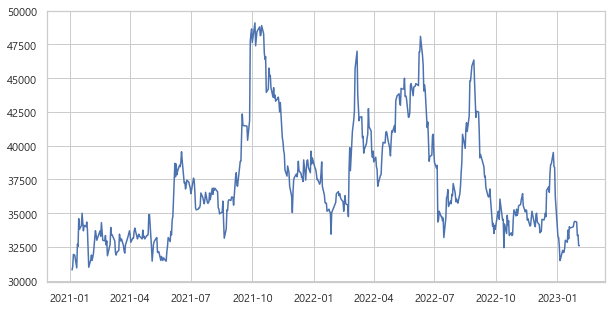

In [32]:
## 2022년 난방 공사별 비교 
## 한국가스공사
koreagas = fdr.DataReader('036460','2021')
koreagas
plt.plot(koreagas.Close)
plt.show()

Text(0.5, 1.0, 'localgas')

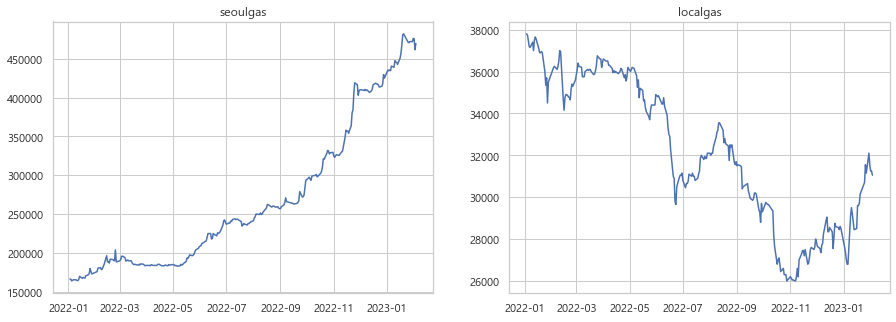

In [31]:
# 도시가스 공사별 비교 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(seoulgas['Close'])
ax1.set_title("seoulgas")
ax2.plot(localgas['Close'])
ax2.set_title("localgas")

<AxesSubplot:xlabel='ChangeCode', ylabel='count'>

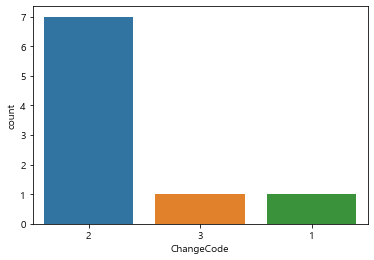

In [36]:
sns.countplot(x="ChangeCode",data=gas )

In [ ]:
# 수혜주 관련 기업
de = fdr.DataReader('117580','2022') #대성에너지
di = fdr.DataReader('128820','2022') #대성산업
gse = fdr.DataReader('053050','2022') #지에스이
sam = fdr.DataReader('004690','2022')#삼천리
skgas = fdr.DataReader('018670','2022')#SK에너지
shenergy = fdr.DataReader('002360','2022')#SH에너지

### 종가

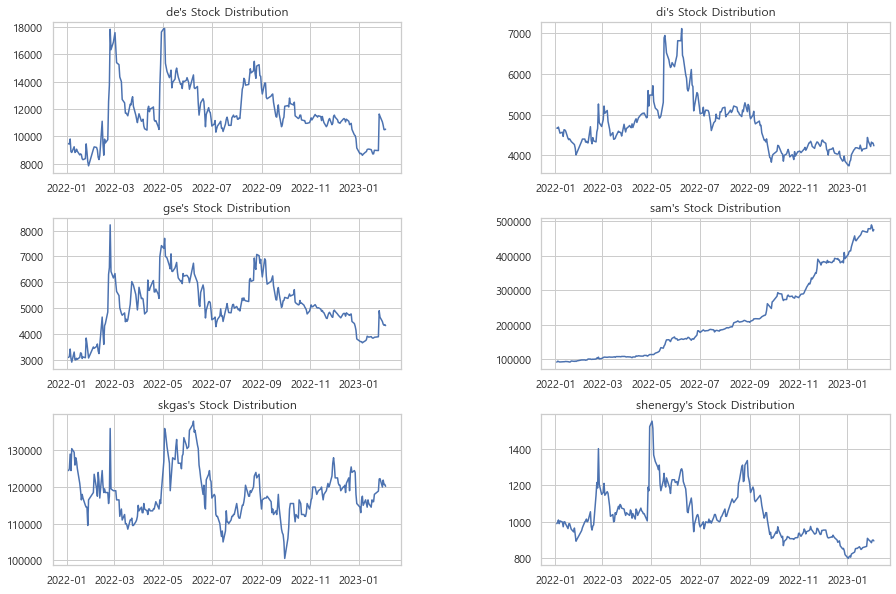

In [19]:
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

gas_companies = ["de", "di", "gse", "sam", "skgas", "shenergy"]
gas_c = ["117580", "128820", "053050", "004690", "018670", "002360"]

for idx, code in enumerate(gas_c):
    ax = plt.subplot(grid[idx])
    ax.plot(fdr.DataReader(code, '2022').Close)
    ax.set_title("{}'s Stock Distribution".format(gas_companies[idx]))

### 거래 규모

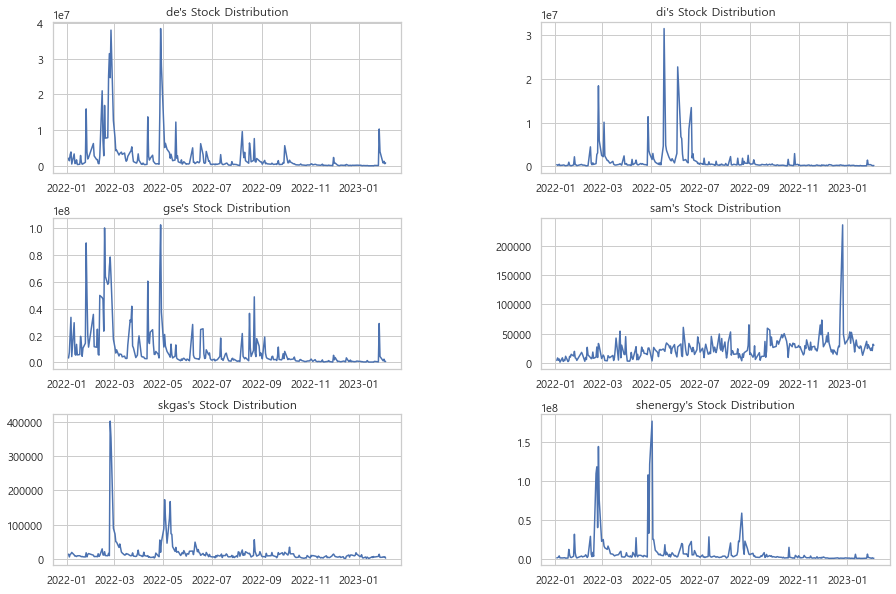

In [20]:
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

gas_companies = ["de", "di", "gse", "sam", "skgas", "shenergy"]
gas_c = ["117580", "128820", "053050", "004690", "018670", "002360"]

for idx, code in enumerate(gas_c):
    ax = plt.subplot(grid[idx])
    ax.plot(fdr.DataReader(code, '2022').Volume)
    ax.set_title("{}'s Stock Distribution".format(gas_companies[idx]))

#### (1) 비슷한 추세를 갖는 기업/공사 = 서울가스, 삼천리

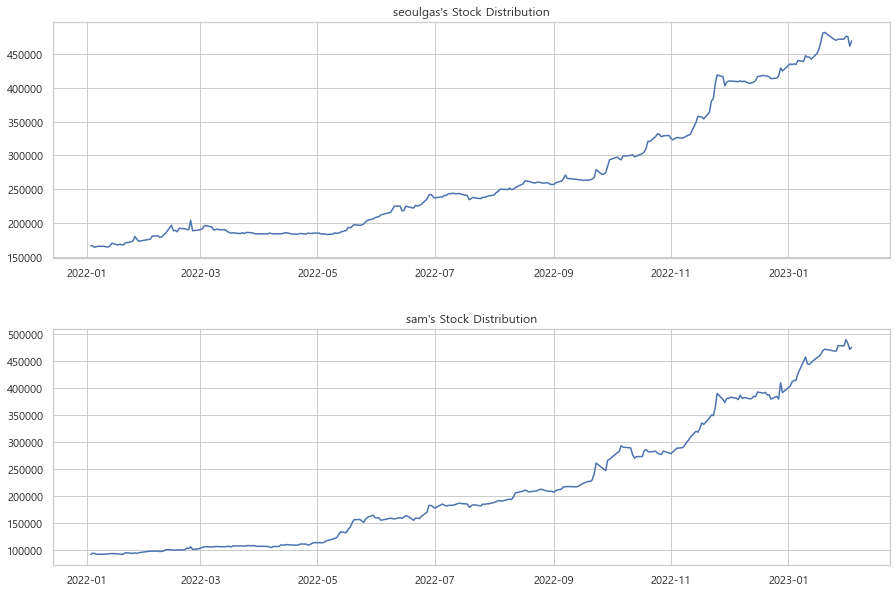

In [22]:
grid = gridspec.GridSpec(2,1)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

gas_companies = ["seoulgas", "sam"]
gas_c = ["017390", "004690"]

for idx, code in enumerate(gas_c):
    ax = plt.subplot(grid[idx])
    ax.plot(fdr.DataReader(code, '2022').Close)
    ax.set_title("{}'s Stock Distribution".format(gas_companies[idx]))

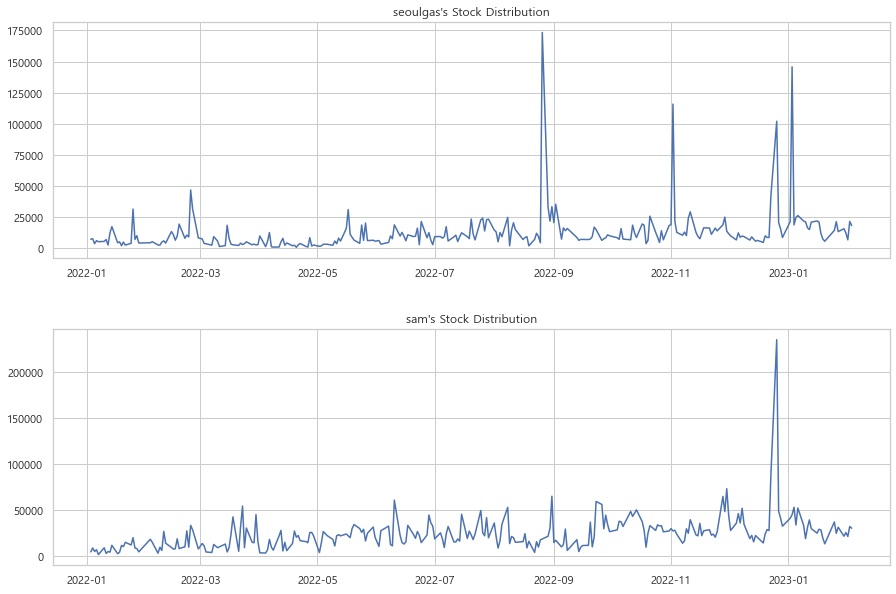

In [27]:
grid = gridspec.GridSpec(2,1)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

gas_companies = ["seoulgas", "sam"]
gas_c = ["017390", "004690"]

for idx, code in enumerate(gas_c):
    ax = plt.subplot(grid[idx])
    ax.plot(fdr.DataReader(code, '2022').Volume)
    ax.set_title("{}'s Stock Distribution".format(gas_companies[idx]))

#### (2)비슷한 추세를 갖는 기업 = 대성에너지, sk에너지, sh에너지

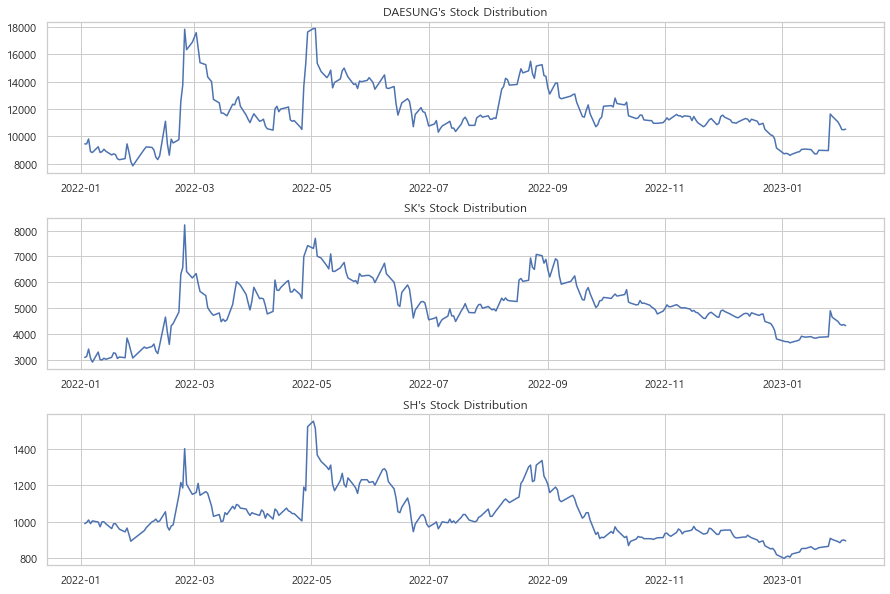

In [24]:
grid = gridspec.GridSpec(3,1)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

gas_companies = ["DAESUNG", "SK", "SH"]
gas_c = ["117580", "053050", "002360"]

for idx, code in enumerate(gas_c):
    ax = plt.subplot(grid[idx])
    ax.plot(fdr.DataReader(code, '2022').Close)
    ax.set_title("{}'s Stock Distribution".format(gas_companies[idx]))

#### 고점을 찍은 시기
- 22.03:우크라이나/러시아 전쟁의 영향으로 에너지 수급난이 커지면서 유럽 가스 공급 차질로 LNG가격 상승 
- 22.08:미국 천연가스 14년 만에 최고가, 미국 천연가스 선물 가격이 MMBtu당 0.329달러를 기록하며 2008년 이후 14년 만에 최고가를 찍음.
- 23.01:가스비 최대 7배 인상, 난방비 폭탄에 가스주 웃음.(반사이익) 
- why??? 삼천리, 서울가스공사의 주가가 꾸준히 상승한 이유는?

#### 가스비 상승 인플레이션 
- 전력 단가 상승 -> 공장 가동비용 상승 -> 생산 원가 상승 -> 전반적 물가 상승

#### 천연가스/도시가스 요금 결정 요소
- 도시가스 도매 요금은 천연가스를 수입하는 '한국가스공사'가 정하고, 소매요금은 각 시도 지자체 공급 비용을 따져 결정함. 
- 따라서, 가스공사는 천연가스 폭등으로 적자를 피할 수 없었지만, 도시가스 업체는 공급 비용이 고려돼 상대적인 안정적 수익을 얻을 수 있음. 
출처: https://news.jtbc.co.kr/article/article.aspx?news_id=NB12112658